In [1]:
#Importing required packages.
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from experiments import Experiment
%matplotlib inline

#Loading dataset
wine = pd.read_csv('datasets/wine.csv')
#Let's check how the data is distributed
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [2]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

** Data Visualization and Exploration **

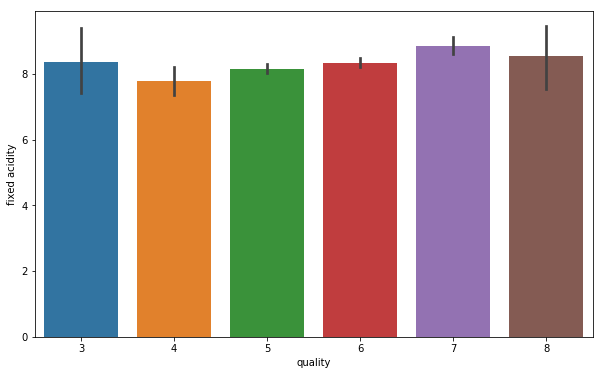

In [3]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

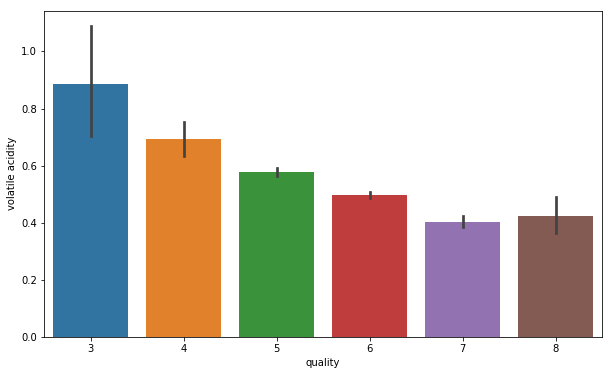

In [4]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

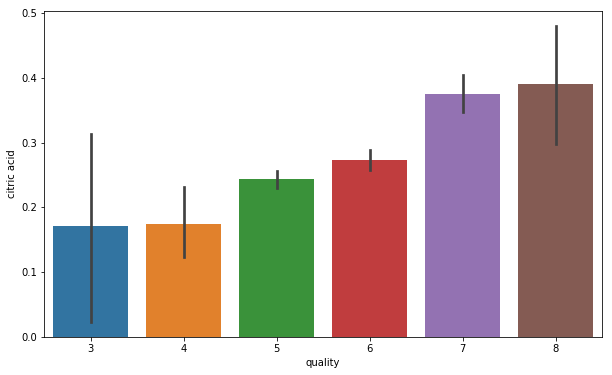

In [5]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

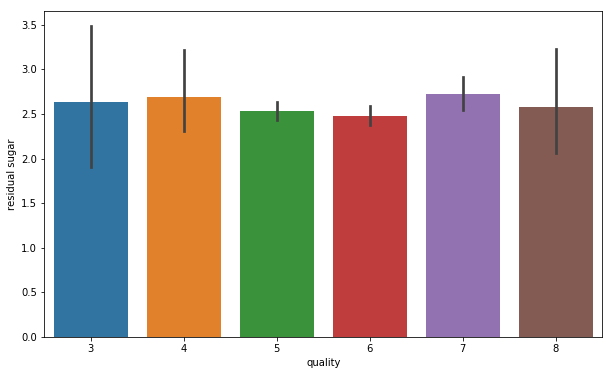

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

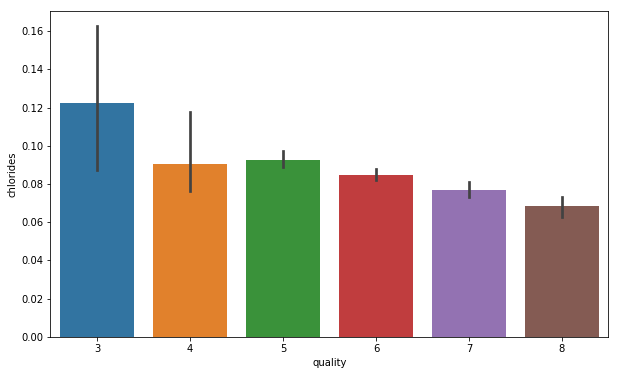

In [7]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

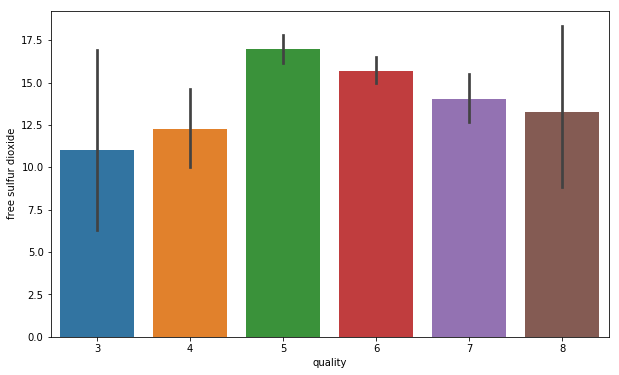

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

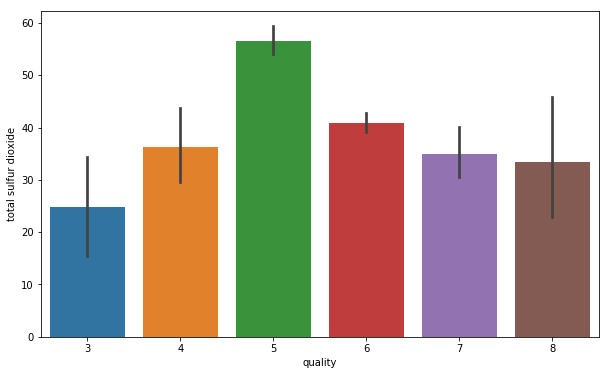

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

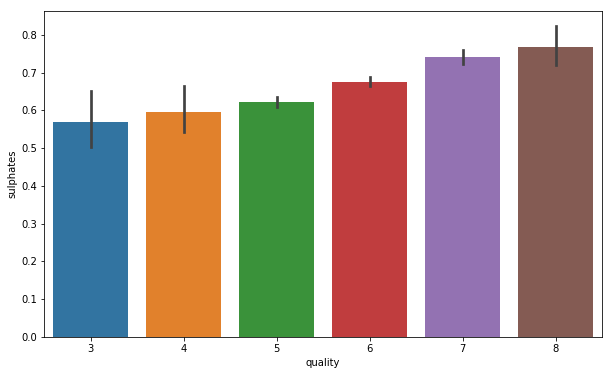

In [10]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

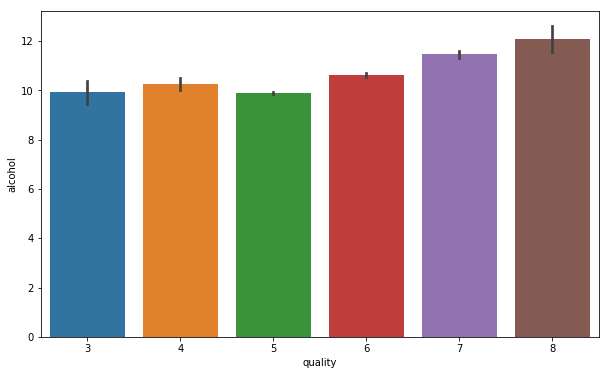

In [11]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [12]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [13]:
include = ['sulphates', 'alcohol', 'volatile acidity']
ex = Experiment(wine, 'quality', include, ['quality'], 'Wine', 0xAB)
ex.preprocess()

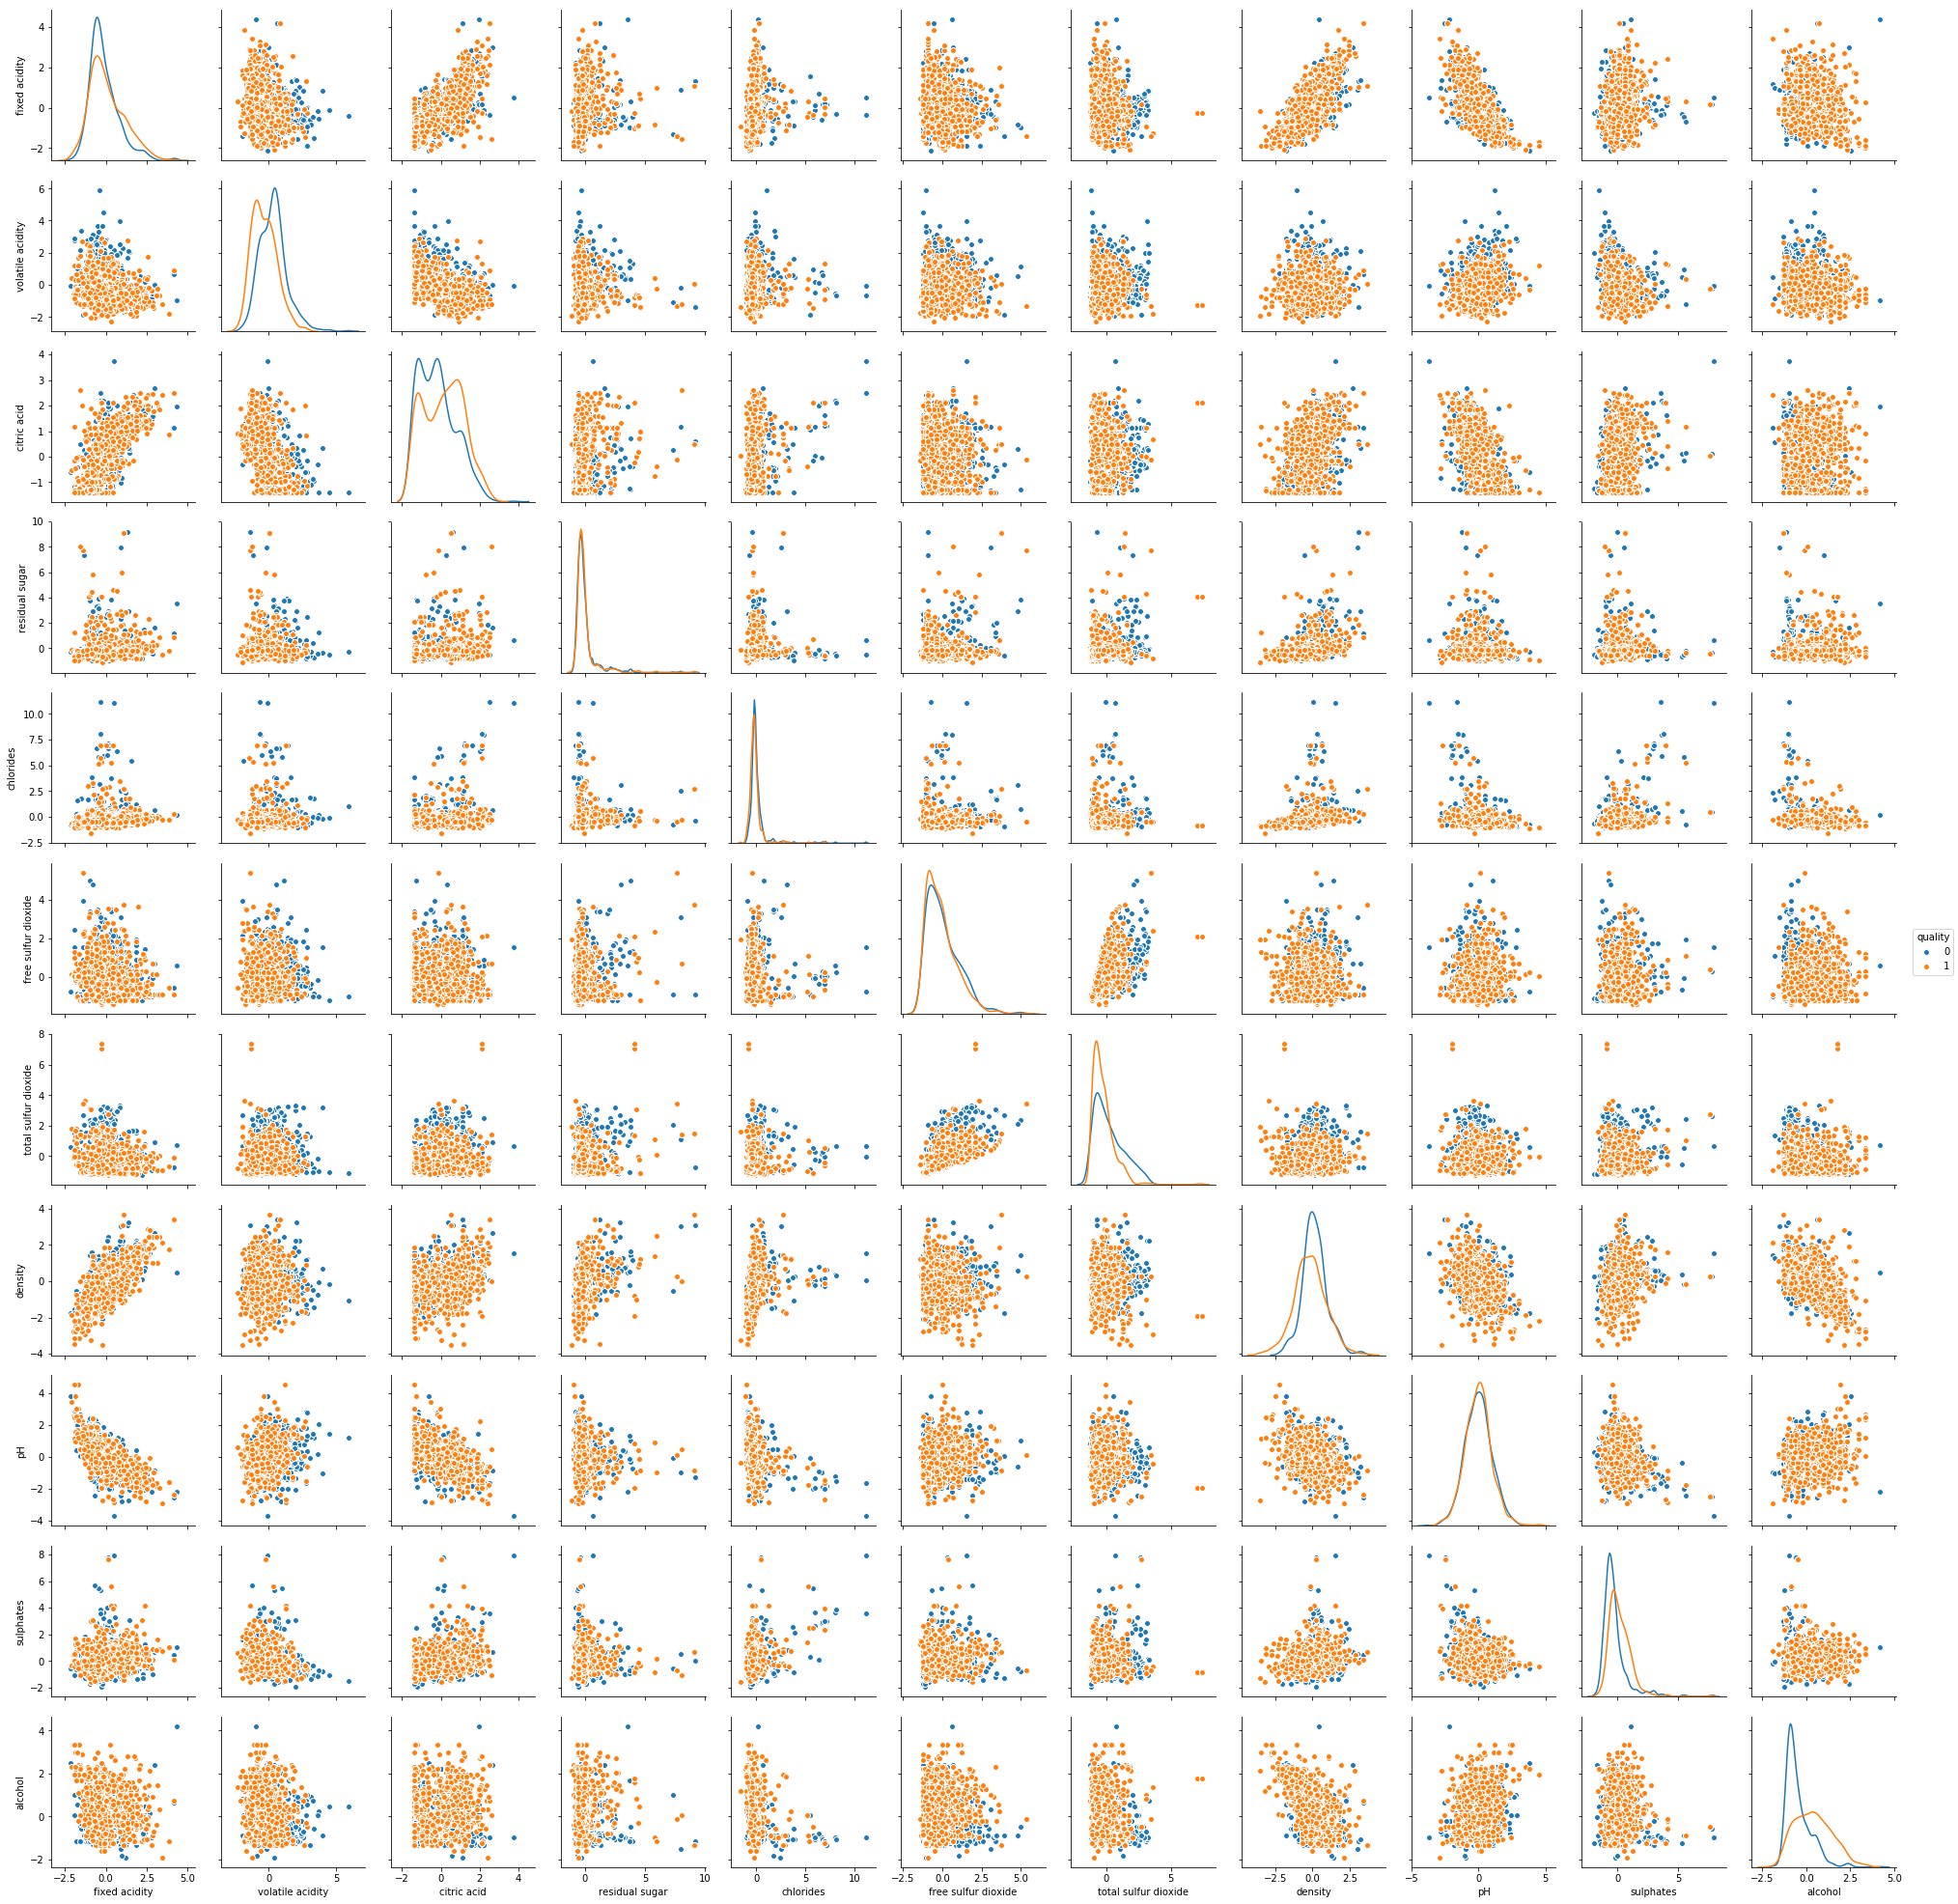

In [14]:
ex.scatter_mat()

# Manual

In [15]:
ex.reduced_set()

   sulphates   alcohol  volatile acidity
0  -0.579207 -0.960246          0.961877
1   0.128950 -0.584777          1.967442
2  -0.048089 -0.584777          1.297065
3  -0.461180 -0.584777         -1.384443
4  -0.579207 -0.960246          0.961877


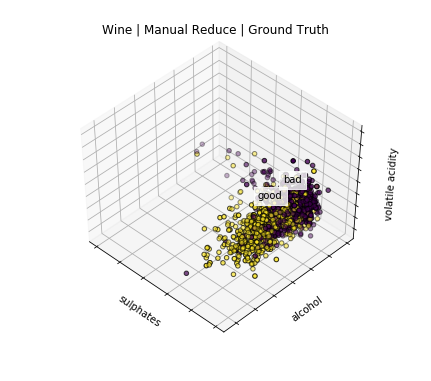

In [16]:
ex.groundTruth(2)

** K-Means with Two Clusters **

-3292.27287438
-3292.51641352


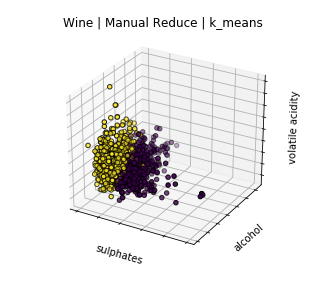

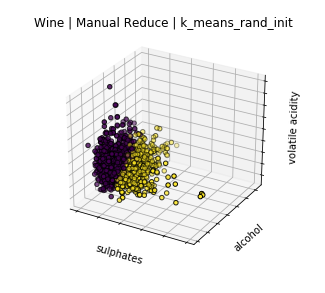

In [17]:
ex.k_means_n_clust(2)

** Gaussian Mixture with 2 components **

/home/rocket/miniconda3/envs/superLearn/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


-3.90475693887
-4.12326773921
-3.96219976979
-4.05045258238


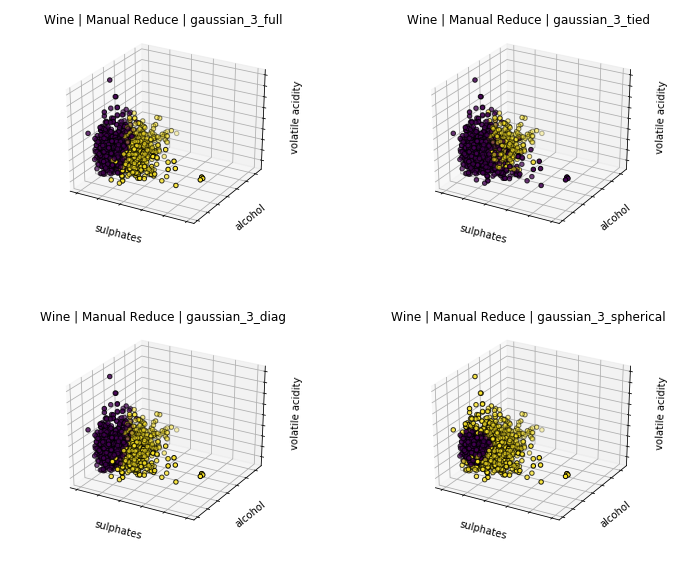

In [18]:
ex.gauss_mix(2)

0.746716697936
0.729831144465


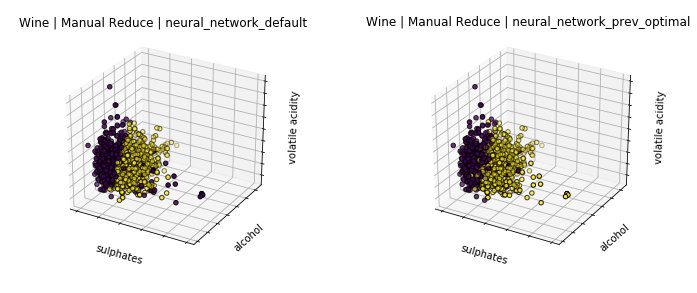

In [19]:
ex.neural_net()

# PCA
Decomposition of Dataset with PCA

In [20]:
ex.decomp_set('pca', 3)

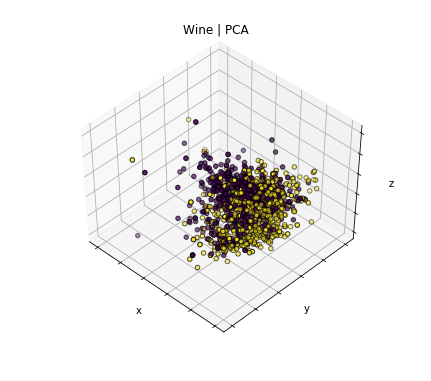

In [21]:
ex.plt_decomp()

-69.9081580938
-79.9245874612


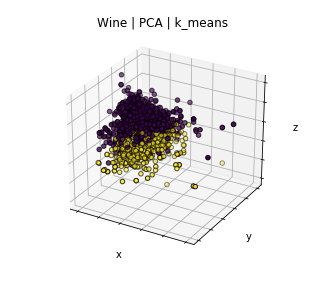

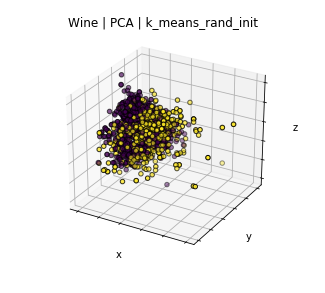

In [22]:
ex.k_means_n_clust(2)

1.71991476568
1.66581009495
1.70456268014
1.68331059769


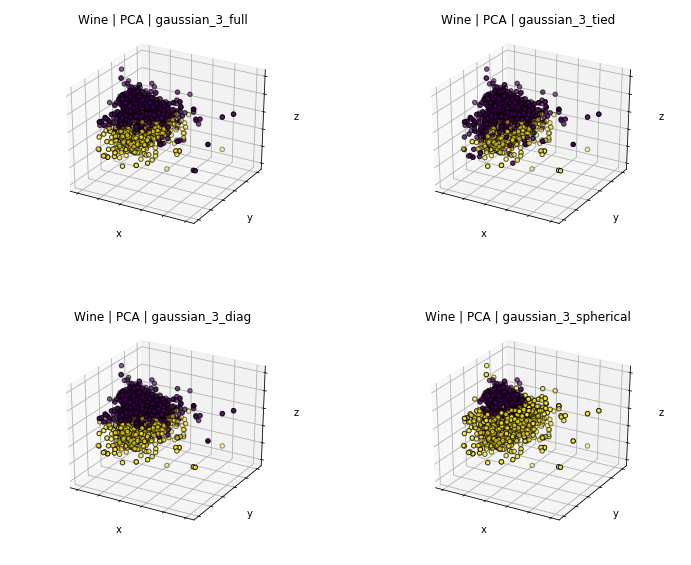

In [23]:
ex.gauss_mix(2)

0.717948717949


/home/rocket/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.715447154472


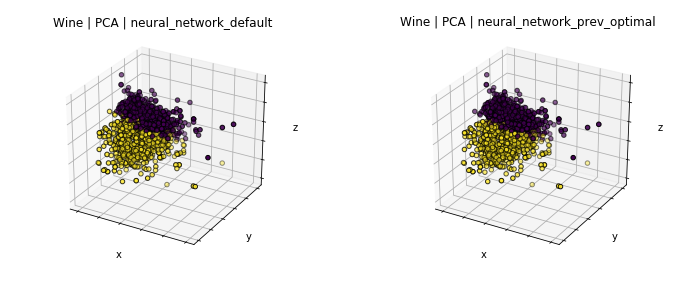

In [24]:
ex.neural_net()

# ICA

In [25]:
ex.decomp_set('ica', 3)

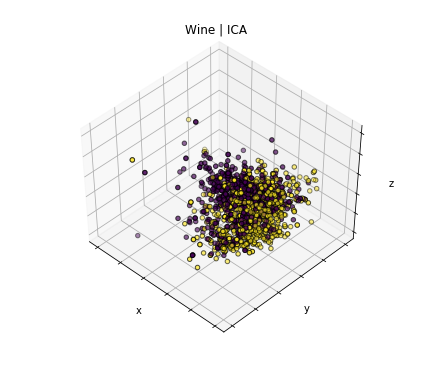

In [26]:
ex.plt_decomp()

-69.9081580938
-79.9245874612


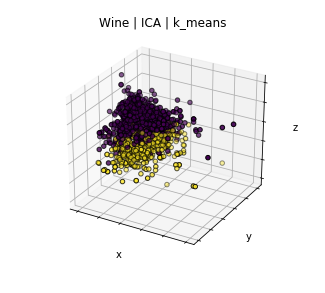

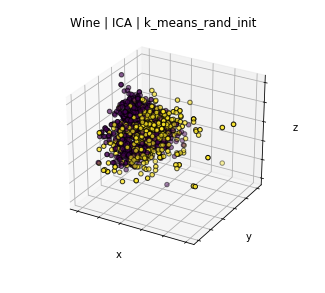

In [27]:
ex.k_means_n_clust(2)

1.71991476568
1.66581009495
1.70456268014
1.68331059769


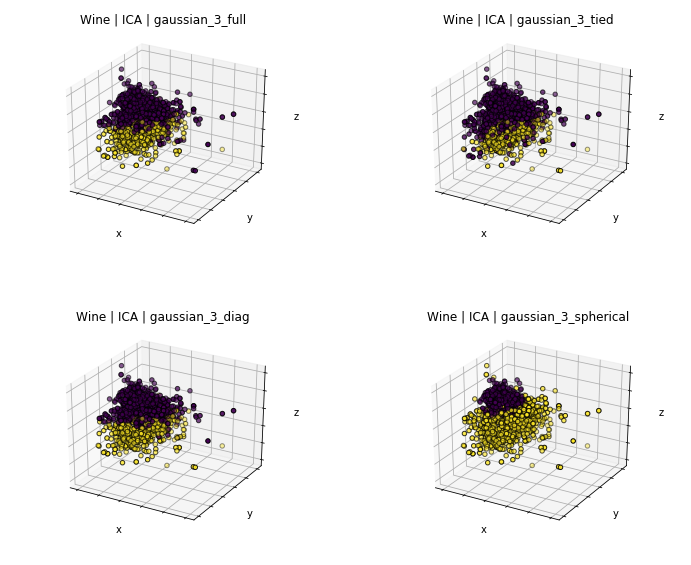

In [28]:
ex.gauss_mix(2)

0.717948717949
0.715447154472


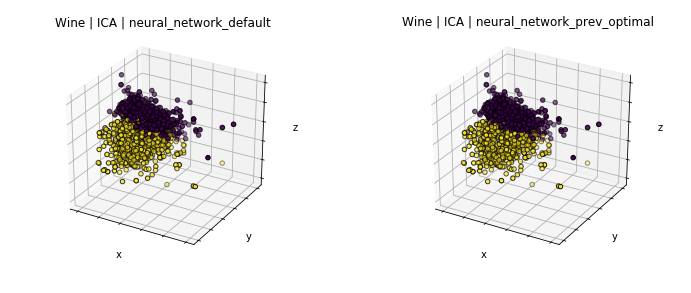

In [29]:
ex.neural_net()

# LDA

In [30]:
ex.decomp_set('lda', 3)

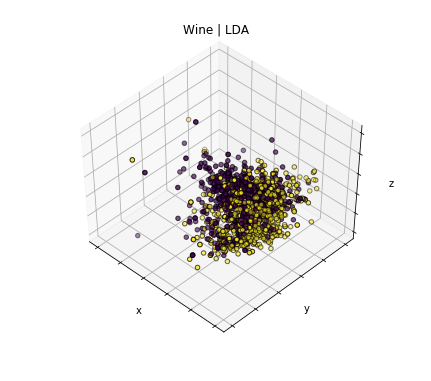

In [31]:
ex.plt_decomp()

-69.9081580938
-79.9245874612


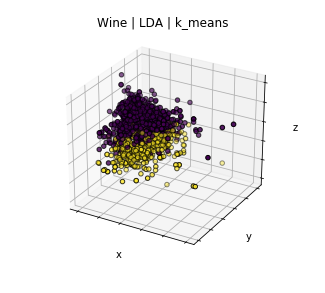

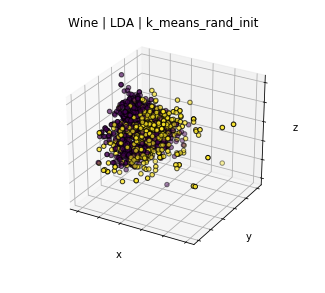

In [32]:
ex.k_means_n_clust(2)

1.71991476568
1.66581009495
1.70456268014
1.68331059769


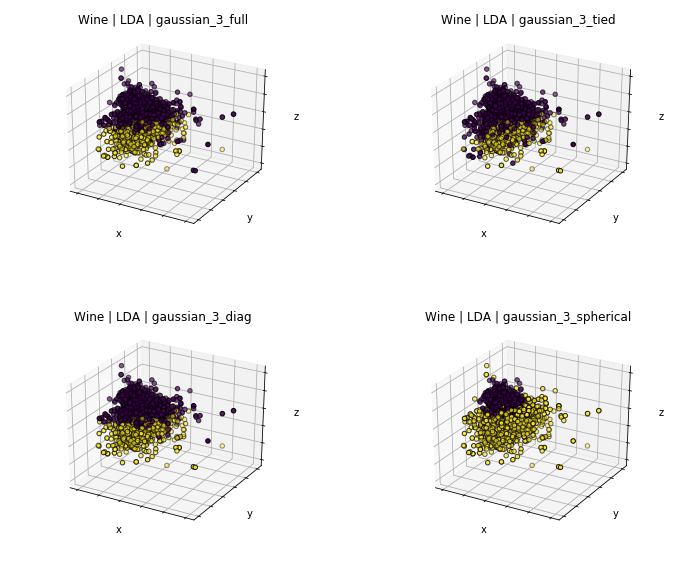

In [33]:
ex.gauss_mix(2)

0.722326454034
0.715447154472


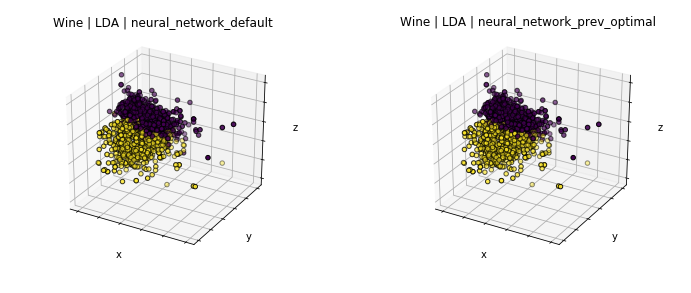

In [34]:
ex.neural_net()

# GRP

In [35]:
ex.decomp_set('grp', 3)

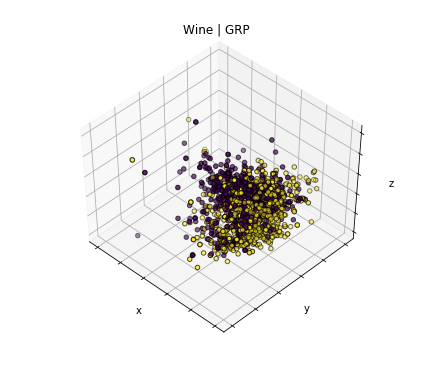

In [36]:
ex.plt_decomp()

-69.9081580938
-79.9245874612


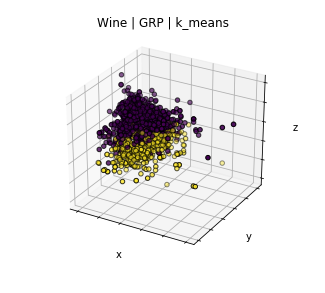

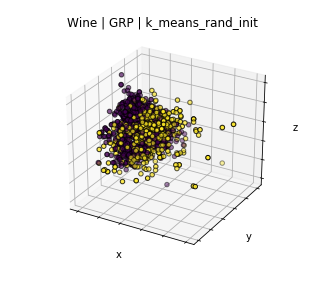

In [37]:
ex.k_means_n_clust(2)

1.71991476568
1.66581009495
1.70456268014
1.68331059769


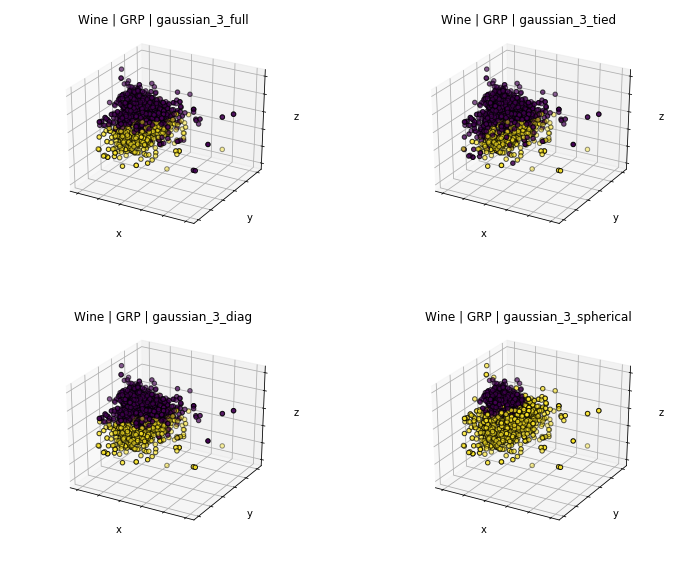

In [38]:
ex.gauss_mix(2)

0.719824890557
0.715447154472


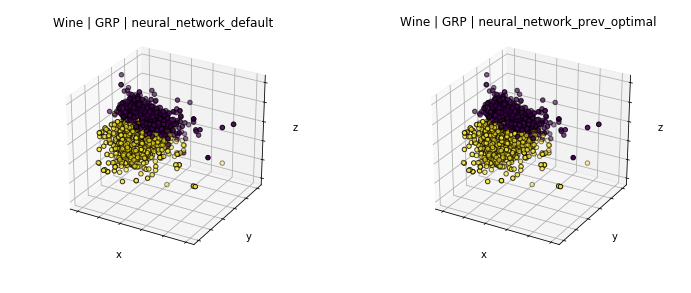

In [39]:
ex.neural_net()